In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt 
from skimage import metrics
import torch, torchvision
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity

### Task 1
Take an image. Add noise to it. You may add Gaussian noise for three different noise intensities. Display the noisy images.

In [5]:
#function to convert img to RGB to display in matplotlib

def show_img(img,title=''):
    image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.title(title)
    plt.imshow(image);

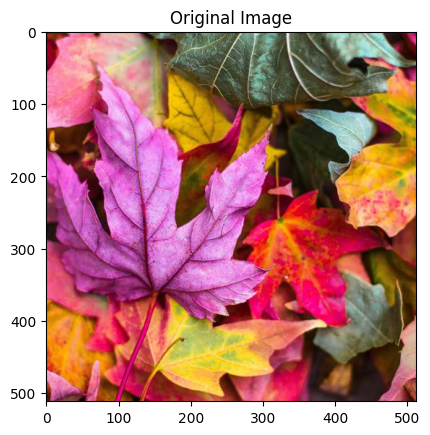

In [6]:
img = cv2.imread('leaves.jpg')
show_img(img, 'Original Image')

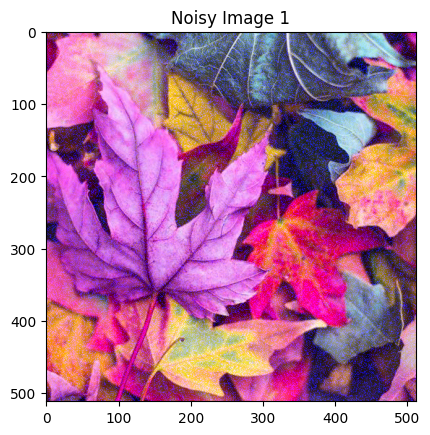

In [7]:
mean = 0
stddev = 180
noise1 = np.zeros(img.shape,np.uint8)
cv2.randn(noise1,mean,stddev)
noisy_img1 = cv2.add(img, noise1)

show_img(noisy_img1,"Noisy Image 1")

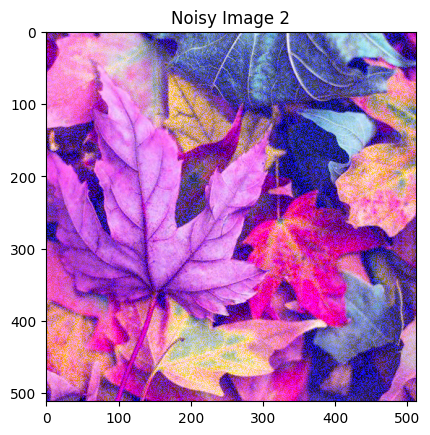

In [8]:
mean = 128
stddev = 1024
noise2 = np.zeros(img.shape,np.uint8)
cv2.randn(noise2,mean,stddev)
noisy_img2 = cv2.add(img, noise2)

show_img(noisy_img2,"Noisy Image 2")

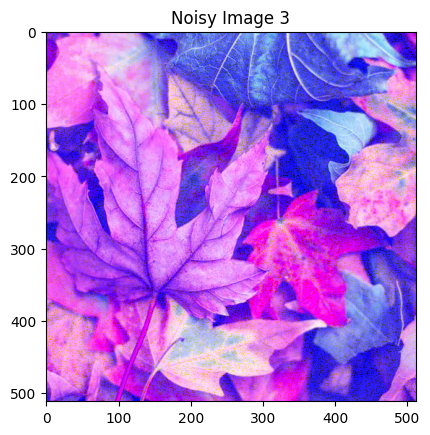

In [9]:
mean = 2048
stddev = 2048
noise3 = np.zeros(img.shape,np.uint8)
cv2.randn(noise3,mean,stddev)
noisy_img3 = cv2.add(img, noise3)

show_img(noisy_img3, "Noisy Image 3")

### Task 2
Take an image. Blur it. You may use Gaussian blur, motion blur and defocus blur. Display the blurred images.

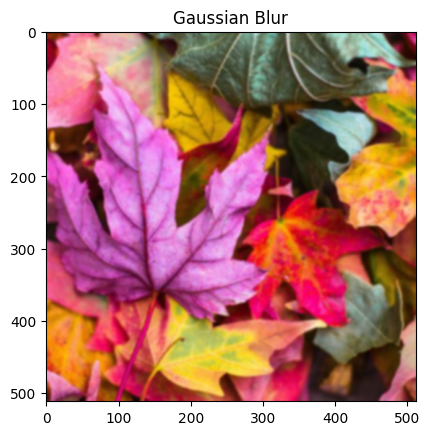

In [10]:
gaussian_blur = cv2.GaussianBlur(img, (7,7), 0)
show_img(gaussian_blur, "Gaussian Blur")

In [11]:
def MotionBlur(img,type = 'v'):
    kernel_size = 30
    
    vertical_kernel = np.zeros((kernel_size,kernel_size))
    horizontal_kernel = np.copy(vertical_kernel)
    
    vertical_kernel[:, int((kernel_size-1)/2)] = np.ones(kernel_size)
    horizontal_kernel[int((kernel_size-1)/2),:] = np.ones(kernel_size)
    
    vertical_kernel /= kernel_size
    horizontal_kernel /= kernel_size
    
    if type.lower() == 'v':
        vertical_MB = cv2.filter2D(img,-1,vertical_kernel)
        return vertical_MB
    else :
        horizontal_MB = cv2.filter2D(img, -1, horizontal_kernel)
        return horizontal_MB
    

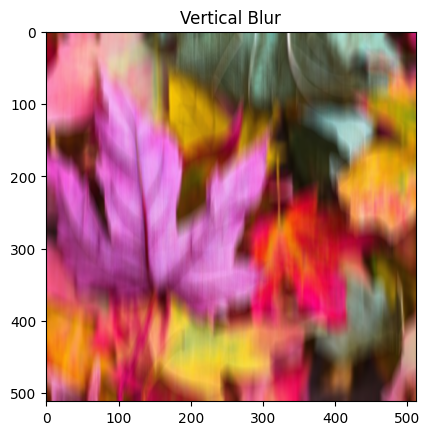

In [12]:
vertical_blur = MotionBlur(img,'v')
show_img(vertical_blur, "Vertical Blur")

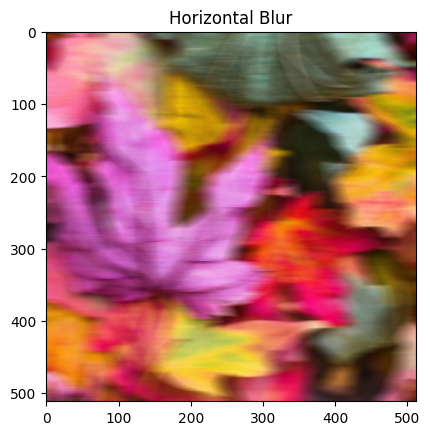

In [13]:
horizontal_blur = MotionBlur(img,'h')
show_img(horizontal_blur, "Horizontal Blur")

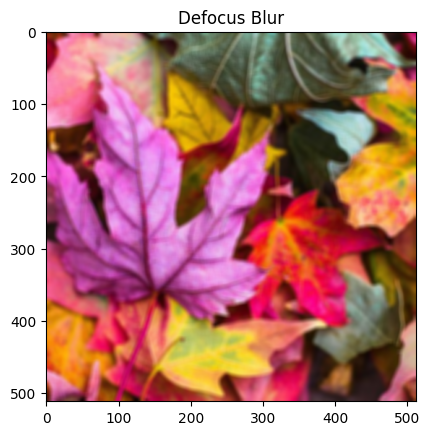

In [14]:
defocus_blur = cv2.blur(img, (7,7))
show_img(defocus_blur, "Defocus Blur")

### PSNR : Peak Signal-to-noise ratio
ratio between maximum possible power of an image and the power of the corrupting noise which affects the quality of the image

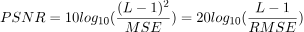

L -> number of maximum possible intensity levels\
O -> matrix data of original image\
D -> matrix data of degraded (noisy) image\
m -> number of rows of pixels\
i -> index of the row of the image\
n -> number of columns of pixels\
j -> index of the column of the image


In [15]:
def PSNR(original, distorted):
    
    mse = np.mean((original - distorted)**2)
    if mse == 0:
        #no noise
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [16]:
print("PSNR values")
print("Noisy Image 1 : ", PSNR(img, noisy_img1))
print("Noisy Image 2 : ", PSNR(img, noisy_img2))
print("Noisy Image 3 : ", PSNR(img, noisy_img3))
print("Gaussian Blur : ", PSNR(img, gaussian_blur))
print("Vertical Blur : ", PSNR(img, vertical_blur))
print("Horizontal Blur : ", PSNR(img, horizontal_blur))
print("Defocus Blur : ", PSNR(img, defocus_blur))

PSNR values
Noisy Image 1 :  35.66753979727421
Noisy Image 2 :  35.33720075253844
Noisy Image 3 :  33.50794633319879
Gaussian Blur :  32.66582182743551
Vertical Blur :  29.011924661562446
Horizontal Blur :  28.91070059731109
Defocus Blur :  31.043530001303456


### SSIM : Structural Similarity Index

Asseses Structural Similarity between two images. Considers luminance, contrast and structure. Gives a score between -1 (dissimilar) and 1 (identical)

In [17]:
def SSIM(original, distorted):
    img1_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(distorted, cv2.COLOR_BGR2GRAY)
    
    ssim = metrics.structural_similarity(img1_gray, img2_gray, full = True)
    
    return round(ssim[0], 2)
    

In [18]:
print("SSIM values")
print("Noisy Image 1 : ", SSIM(img, noisy_img1))
print("Noisy Image 2 : ", SSIM(img, noisy_img2))
print("Noisy Image 3 : ", SSIM(img, noisy_img3))
print("Gaussian Blur : ", SSIM(img, gaussian_blur))
print("Vertical Blur : ", SSIM(img, vertical_blur))
print("Horizontal Blur : ", SSIM(img, horizontal_blur))
print("Defocus Blur : ", SSIM(img, defocus_blur))

SSIM values
Noisy Image 1 :  0.81
Noisy Image 2 :  0.74
Noisy Image 3 :  0.8
Gaussian Blur :  0.87
Vertical Blur :  0.5
Horizontal Blur :  0.48
Defocus Blur :  0.74


### LPIPS : Learned Perpetual Image Patch Similarity
Computed the similarity between the activations of two image patched for some pre-defined network.

In [34]:
def LPIPS(original, distorted):
    img1 = torch.from_numpy(np.array(original)).float()
    img2 = torch.from_numpy(np.array(distorted)).float()
    
    img1 = img1.unsqueeze(0).permute(0,3,1,2).float()/127.5 -1
    img2 = img2.unsqueeze(0).permute(0,3,1,2).float()/127.5 -1
    
    lpips = LearnedPerceptualImagePatchSimilarity(net_type='squeeze')
    
    return lpips(img1,img2).item()
    

In [35]:
print("LPIPS values")
print("Noisy Image 1 : ", LPIPS(img, noisy_img1))
print("Noisy Image 2 : ", LPIPS(img, noisy_img2))
print("Noisy Image 3 : ", LPIPS(img, noisy_img3))
print("Gaussian Blur : ", LPIPS(img, gaussian_blur))
print("Vertical Blur : ", LPIPS(img, vertical_blur))
print("Horizontal Blur : ", LPIPS(img, horizontal_blur))
print("Defocus Blur : ", LPIPS(img, defocus_blur))

LPIPS values
Noisy Image 1 :  0.4908258616924286
Noisy Image 2 :  0.5961086750030518
Noisy Image 3 :  0.6276862621307373
Gaussian Blur :  0.169098362326622
Vertical Blur :  0.36453497409820557
Horizontal Blur :  0.35744088888168335
Defocus Blur :  0.2792564332485199
